<h1>Opening the dataset</h1>

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Legion\Desktop\Python\Datasets\RCDataset-ML-1.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


In [2]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12215.000000,12225.000000,12196.000000,12204.000000,12196.000000,12191.000000,12216.000000,12208.000000,12222.000000,12201.000000,12214.000000,12218.000000,12204.000000,12179.000000
mean,2.315759,80.741179,0.502706,34.733067,31.814447,1192.220406,0.022231,0.043050,5.869171,0.061011,2.124857,2.358324,3.146673,4.069464
std,3.319969,176.660783,1.271342,141.364602,44.607472,1905.738105,0.048569,0.048543,18.545277,0.198111,0.912112,1.716343,2.401164,4.030383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.050000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.000000,0.000000,0.000000,18.000000,598.450000,0.003098,0.025183,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.750000,0.000000,0.000000,38.000000,1464.986002,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<h1>Handling the missing values</h1>

In [3]:
df.isna().sum()

Administrative             115
Administrative_Duration    105
Informational              134
Informational_Duration     126
ProductRelated             134
ProductRelated_Duration    139
BounceRates                114
ExitRates                  122
PageValues                 108
SpecialDay                 129
Month                      118
OperatingSystems           116
Browser                    112
Region                     126
TrafficType                151
VisitorType                116
Weekend                    131
Revenue                      0
dtype: int64

As we can see, there are many missing values, which aren't available. So before processing with our data, we should fill the <i>NaN</i> values. But we want to use <i>KNNImputer</i> for missing values of categorical column and this requires us to transfrom the categorical columns to numerical ones. We transform this columns by using <i>LabelEncoder</i>

In [4]:
from sklearn.preprocessing import LabelEncoder

categorical, numerical = df.select_dtypes(include = ['bool','object']).columns, df.select_dtypes(include = 'float64').columns
for column in categorical:
    le = LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])
    
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1.0,1.0,1.0,1.0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2.0,2.0,1.0,2.0,2,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,NaN,0.20,0.0,0.0,2,4.0,1.0,9.0,3.0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3.0,2.0,2.0,4.0,2,0,0
4,0.0,NaN,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3.0,3.0,1.0,4.0,2,1,0


After transforming the categorical values to numerical values, it's time to use the <i>value imputer</i>, namely <i><b>KNN-Imputer</b></i><br>
<br><b><a href = "https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer">KNN Imputer</a></b> : Imputation for completing missing values using k-Nearest Neighbor Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.compose import make_column_transformer

transformed = make_column_transformer((KNNImputer(weights = 'uniform'),numerical),
                                     (KNNImputer(),categorical),
                                     remainder = 'passthrough')
transformed

ColumnTransformer(remainder='passthrough',
                  transformers=[('knnimputer-1', KNNImputer(),
                                 Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')),
                                ('knnimputer-2', KNNImputer(),
                                 Index(['Month', 'VisitorType', 'Weekend', 'Revenue'], dtype='object'))])

In [6]:
import numpy as np
transformed.fit(df)
ct = transformed.transform(df)
n,c = np.asarray(numerical),np.asarray(categorical)
df = pd.DataFrame(ct,columns = np.concatenate((n,c)))
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,4.0,1.0,9.0,3.0,2.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,3.0,2.0,2.0,4.0,2.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,3.0,3.0,1.0,4.0,2.0,2.0,1.0,0.0


In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
Month                      0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We filled <b>all</b> the missing values by 2 strategies and we now can continue processing of the data.
<br> Now we would like to analyze the data to figure out what are the most important features that could cause a customer to buy and generate revenue.


We can guess if an user checks his/her Administrative, it could mean that there is a higher possibility that the user is going to buy something

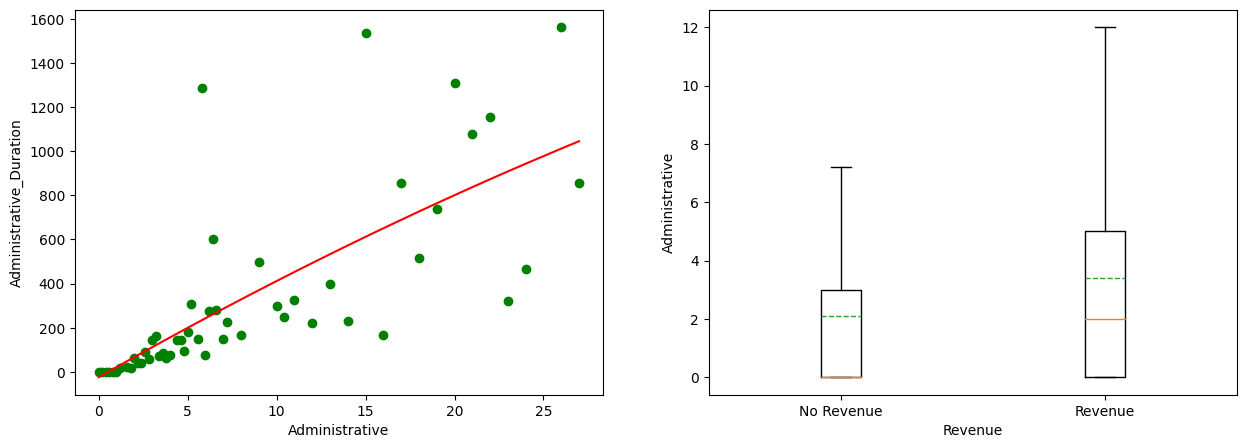

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

f,axes = plt.subplots(1,2,figsize = (15,5))

info = dict((df[['Administrative','Administrative_Duration']]).values)
info = dict(sorted(info.items(),key = lambda x:x[0]))
keys,values = list(info.keys()), list(info.values())

def plot_line(ax_,X,y,degree = None):
    if degree == None:
        degree = 2
    
    lst = [(X[i],y[i]) for i in range(len(X))]
    lst = sorted(lst,key = lambda x:x[0])
    X, y = [value[0] for value in lst], [value[1] for value in lst]
    
    X = np.asarray(X).reshape(-1,1)
    poly = PolynomialFeatures(degree = degree)
    poly.fit(X)
    X_poly = poly.transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    ax_.plot(X,lr.predict(X_poly),color = 'red')
    
    return

axes[0].scatter(keys,values,color = 'green')
axes[0].set(xlabel = 'Administrative', ylabel = 'Administrative_Duration')
plot_line(axes[0],keys,values) 

data = [df.query('Revenue == 0')['Administrative'],df.query('Revenue == 1')['Administrative']]
axes[1].boxplot(data,
                showmeans = True,
                showfliers = False,
               meanline = True)

axes[1].set_xticklabels(['No Revenue','Revenue'])
axes[1].set(ylabel = 'Administrative',xlabel = 'Revenue')

plt.show()

It means the more the user visits the dashboard page, the more is the possibilty that a user buys any product
<br><br><center><b><i>Administrative Duration ~ Administrative visits ~ Revenue</i></b></center>

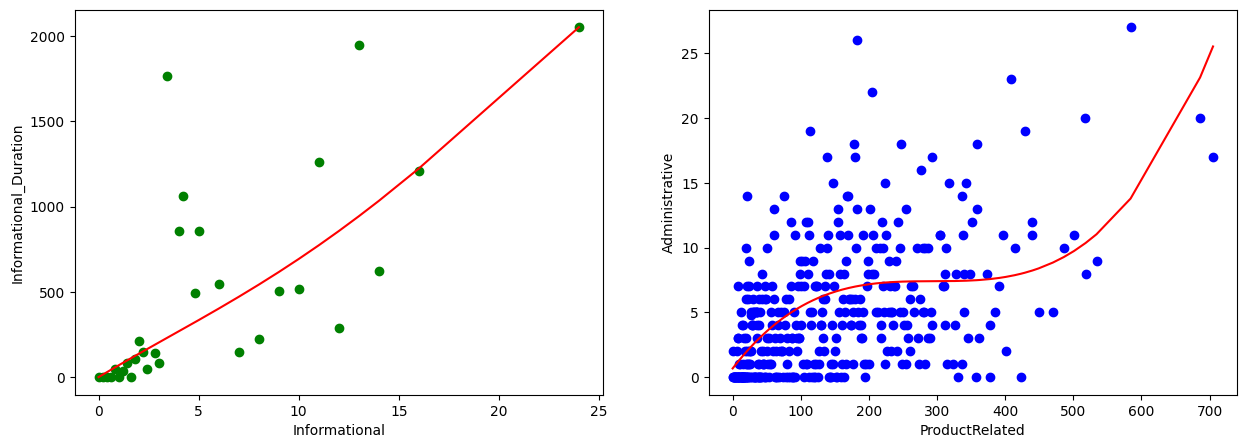

In [9]:
f,axes = plt.subplots(1,2,figsize = (15,5))

def plot_info(ax,column_one,column_second,color = None):
    if color is None:
        color = 'green'
        
    info = dict(df[[column_one,column_second]].values)
    keys,values = list(info.keys()),list(info.values())
    ax.scatter(keys,values,color = color)
    ax.set(xlabel = column_one, ylabel = column_second)
    return

#first ax
plot_info(axes[0],'Informational','Informational_Duration')
plot_line(axes[0],df['Informational'],df['Informational_Duration'],degree = 4)

#second ax
plot_info(axes[1],'ProductRelated','Administrative',color = 'blue')
plot_line(axes[1],df['ProductRelated'],df['Administrative'],degree = 3)

plt.show()

<center><b><i>ProductRelated ~ Administrative</i></b></center>

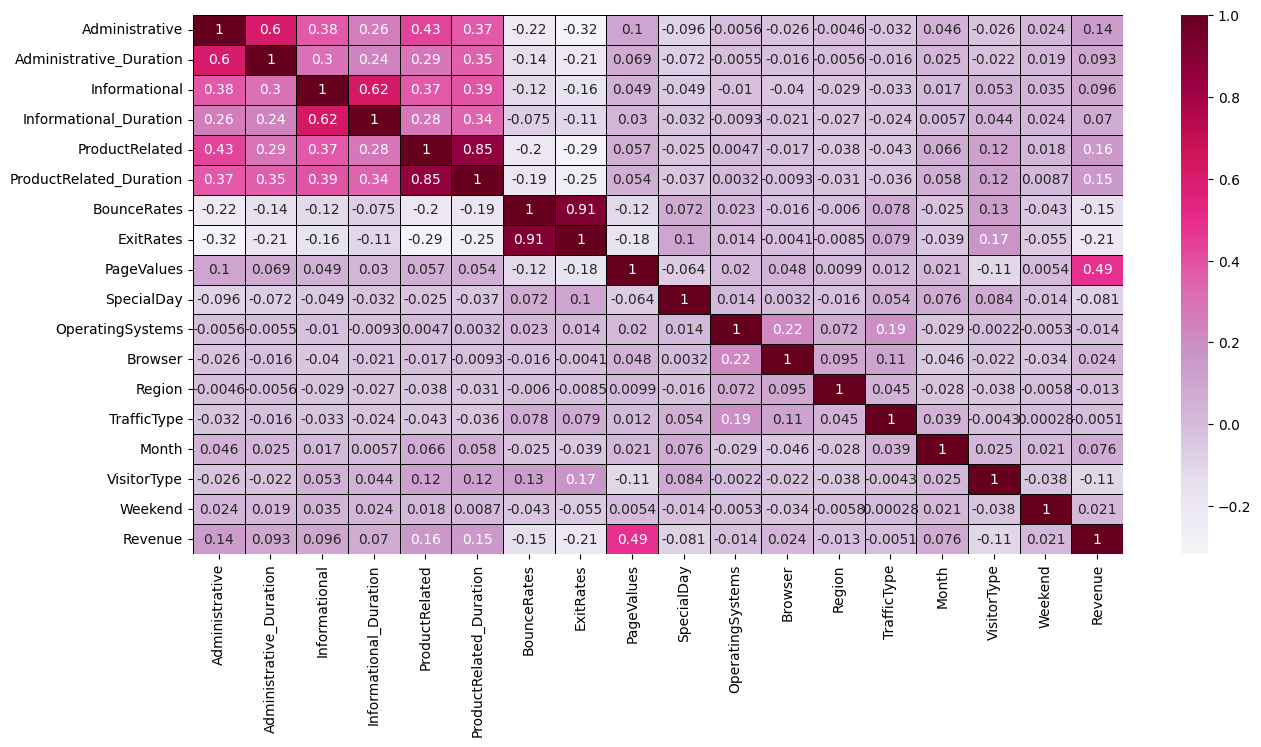

In [10]:
import seaborn as sns

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),cmap = 'PuRd',
           annot = True,
           linewidth = 0.5,
           linecolor = 'black')
plt.show()

<h1>Feature Selection</h1>

After handling the missing and unknown values, it's time to train our model. At first, we select the <i>relevant features</i> then train the models

In [11]:
rvl = pd.DataFrame(df.corr()['Revenue'])
features = []
for row in rvl.index:
    perc = rvl.loc[row,'Revenue']
    if perc>=0.1 and row!='Revenue':
        features.append(row)
features

['Administrative', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']

<h1>Splitting our dataset into two train and test sets</h1>

In [12]:
from sklearn.model_selection import train_test_split

model_scores = {}
X, y = df[features], df['Revenue']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 101, shuffle = True)

<h1>Model Training</h1>

We have selected 3 ML models, namely<br><br>
1 - <i><b>KNeighbors Classifier</b></i><br>
2 - <i><b>SVC</b></i><br>
3 - <i><b>Logistic Regression</b></i>

<h2>KNeighbors Classifier</h2>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

scores = {}
i = 2
while i<=15:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    
    test_sc = round(knn.score(xtest, ytest),3)
    train_sc = round(knn.score(xtrain, ytrain),3)
    
    scores[i] = (train_sc,test_sc)
    i+=1

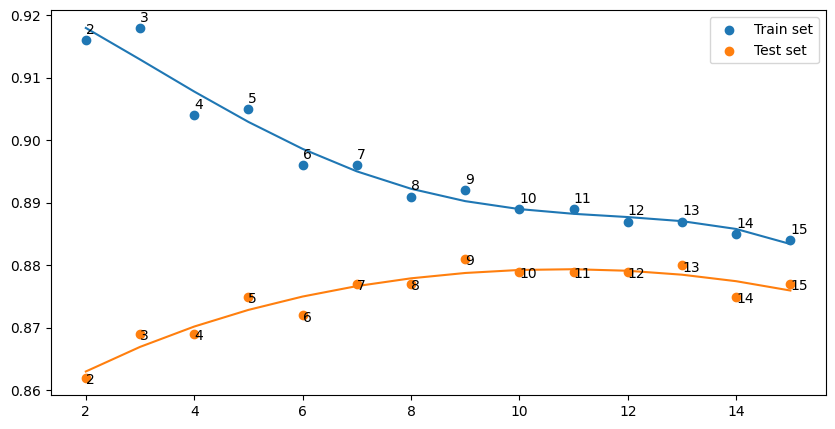

In [14]:
plt.figure(figsize = (10,5))

test_scores, train_scores = [value[1] for value in scores.values()], [value[0] for value in scores.values()]
keys = list(scores.keys())

#scatter train set scores
plt.scatter(scores.keys(),train_scores, label = 'Train set')

#Polynomial Regression
poly = PolynomialFeatures(degree = 4)
poly.fit(np.asarray(keys).reshape(-1,1))
X_poly = poly.transform(np.asarray(keys).reshape(-1,1))
lr = LinearRegression()
lr.fit(X_poly,train_scores)
plt.plot(keys,lr.predict(X_poly))

#scatter test set scores
plt.scatter(scores.keys(),test_scores, label = 'Test set')

#Polynomial Regression
lr.fit(X_poly,test_scores)
plt.plot(keys,lr.predict(X_poly))

i = 0
while i<len(keys):
    plt.annotate(keys[i],(keys[i],train_scores[i]+0.001))
    plt.annotate(keys[i],(keys[i],test_scores[i]-0.001))
    i+=1

plt.legend()

plt.show()

by each iteration, we increased number of neighbors by one and as we can observe, at low <i>n_neighbors</i>, the model is slightly overfitting due to the gap between the train and test scores. But with <b>9 neighborhoods</b>, the train and test scores have the highest values but also have the lowest difference. So our model with <i>KNeighborsClassifier</i> has its <i><b>best performance</b></i> with <b>9 neighborhoods</b>

In [15]:
#train score of 9 neighborhoods
train_score = scores[9][0]*100
#test score of 9 neighborhoods
test_score = scores[9][1]*100

model_scores['KNN'] = [train_score,test_score]

<h1>SVC</h1>

In [16]:
from sklearn.svm import SVC

model = SVC()
model.fit(xtrain,ytrain)

SVC()

In [17]:
train_score = round(model.score(xtrain,ytrain)*100,3)
test_score = round(model.score(xtest,ytest)*100,3)
model_scores['SVC'] = [train_score,test_score]

print('SVC accuracy is {}% and {}% on train and test set respectively'.format(train_score,test_score))

SVC accuracy is 84.86% and 84.528% on train and test set respectively


In [18]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty = 'l2',solver = 'newton-cg')
lg.fit(xtrain,ytrain)

LogisticRegression(solver='newton-cg')

In [19]:
train_score = round(lg.score(xtrain,ytrain)*100,3)
test_score = round(lg.score(xtest,ytest)*100,3)
model_scores['Logistic Regression'] = [train_score,test_score]

print('SVC accuracy is {}% and {}% on train and test set respectively'.format(train_score,test_score))

SVC accuracy is 87.92% and 88.323% on train and test set respectively


In [20]:
scores = pd.DataFrame(model_scores,index = ['Train set','Test set']).T

train_avg,test_avg = sum(value[0] for value in model_scores.values())/3, sum(value[1] for value in model_scores.values())/3
train_avg = round((train_avg),3)
test_avg = round(test_avg,3)

add = pd.DataFrame({'Train set':train_avg,'Test set':test_avg},index = ['Average Score'])
scores = pd.concat([scores,add])

scores

,Train set,Test set
KNN,89.200,88.100
SVC,84.860,84.528
Logistic Regression,87.920,88.323
Average Score,87.327,86.984


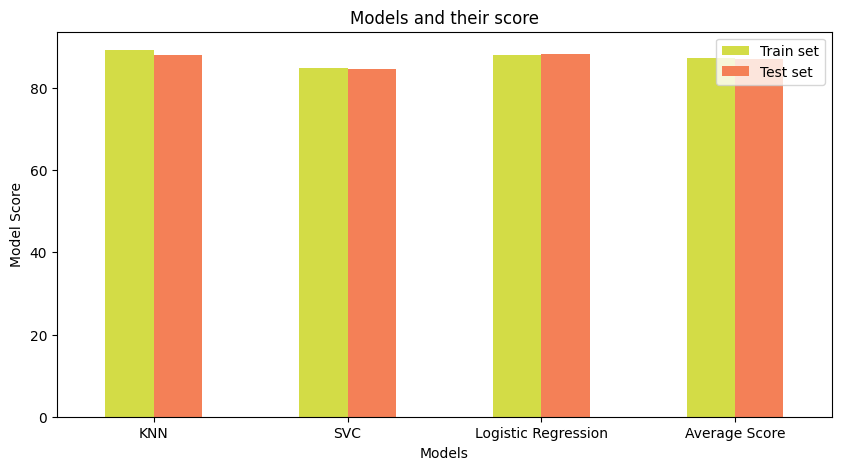

In [21]:
scores.plot.bar(rot = 0,color =  {'Train set':'#D3DC46','Test set':'#F48057'})

plt.title('Models and their score')
plt.ylabel('Model Score')
plt.xlabel('Models')

plt.gcf().set_size_inches(10, 5)

plt.show()

<h1>Conclusion</h1>

In this project, we wanted to train a model to determine whether a customer is going to purchace the product. <b>At first</b>, we cleaned and filled the unknown values with KNN method since replacing them with strategies such as <i>most frequent, median, mean and...</i> can imbalance our dataset<br>
Then we selected the most relevant features and trained our 3 different models. The <b>average accuracy</b> on <i><b>train</b> and <b>test</b> set</i> are <b>87.33%</b> and <b>86.99%</b> respectively.<br>
The <b>highets score</b> was achieved by <i>KNeighbors Classifier</i> with 89.2% and 88.1% accuracy on train and test set>